Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Zhongzhi Zhang"
COLLABORATORS = ""

---

# Orthogonal Polynomials

In this homework, we will construct polynomials using orthogonality with respect to an integral inner product.
For example, given functions $u(x)$ and $v(x)$, we define their inner product to be
$$ \langle u, v \rangle = \int_{-1}^1 u(x) v(x) \mathrm{d} x $$
where we use the notation $\langle u, v \rangle$ to distinguish this continuous inner product from the discrete inner product $u^T v$ of vectors.
This is known as the $L^2$ inner product on the domain $(-1,1)$, which is a Hilbert space and an [$L^p$ space](https://en.wikipedia.org/wiki/Lp_space).  The study of such generalizations of linear algebraic concepts is called Functional Analysis, an advanced mathematical topic that is used in numerical analysis.  We will only need the above definition in this homework.

The inner product induces a norm,
$$ \lVert u \rVert = \sqrt{\langle u, u \rangle} . $$
The inner product and norm satisfy the usual properties from our Linear Algebra notebook.

## Working with polynomials

Numpy has functions such as `polyval`, `polymul`, `polyint` to evaluate, multiply, and integrate polynomials expressed as vectors of coefficients.

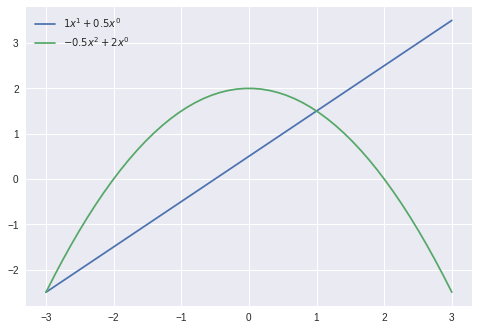

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from IPython.display import display, Math

def polystring(p):
    """Construct a string representation of the polynomial.
    
    You don't need to understand this function, it is only
    used to annotate plots and clearly view polynomials.
    """
    n = len(p) - 1
    return '{}'.format(' + '.join(
        ['{}x^{}'.format(a, n-i) for i,a in enumerate(p) if a != 0]))

def polyplot(p, length=1, label=None):
    """Plot a polynomial p(x) defined by its coefficients
      p[0]*x^n + p[1]*x^(n-1) + ... + p[n-1]*x + p[n]
    where n = len(p)-1.  We evaluate the polynomial using
    numpy.polyval.
    """
    x = np.linspace(-length, length)
    y = np.polyval(p, x)
    n = len(p) - 1
    if label is None:
        label = '$' + polystring(p) + '$'
    plt.plot(x, y, label=label)
    
polyplot([0, 1, .5], 3)
polyplot([-.5, 0, 2], 3)
plt.legend();

The polynomial manipulation functions such as `polyint` are $O(n)$ (linear time) operations on lists or arrays.  We'll start by implementing `polyint`, which computes the indefinite integral
$$ P(x) = \int p(x) \mathrm{d} x, $$
i.e., $P'(x) = p(x)$.
Note that the antiderivative $P(x)$ is a polynomial determined only up to an integration constant, which you may choose arbitrarily.

In [5]:
def my_polyint(p):
    """Without using library functions, compute an indefinite integral
    of p(x) expressed as a polynomial of degree 1 higher than the
    degree of p.  The constant of integration may be chosen arbitrarily.
    """
    n = len(p) - 1
    pint = np.zeros(n+2) # Array to hold the indefinite integral
    # YOUR CODE HERE
    print(p)
    raise NotImplementedError()
    return pint

p = [4, 3, 2, 1]
display(Math('p(x) = ' + polystring(p)))
P = my_polyint(p)
display(Math('P(x) = ' + polystring(P)))

<IPython.core.display.Math object>

[4, 3, 2, 1]


NotImplementedError: 

In [ ]:
def check_polyint(p):
    P = my_polyint(p)
    Pnumpy = np.polyint(p)
    xs = np.linspace(-2, 2, 4)
    assert np.allclose(np.polyval(P, xs) - np.polyval(P, 0),
                       np.polyval(Pnumpy, xs) - np.polyval(Pnumpy, 0))
    
check_polyint([1, 1])
check_polyint([3, -2, 0, 1, 2])
print('Tests pass')

In [ ]:
# Polynomials can be multiplied using polymul
def test_mul():
    p = [.5, 1] # x/2 + 1
    q = [1, -1] # x - 1
    r = [1, -2] # x - 2
    polyplot(p, 3) # root at -2
    polyplot(q, 3) # root at 1
    polyplot(r, 3) # root at 2
    polyplot(np.polymul(p, q), 3) # roots at -2, 1
    polyplot(np.polymul(p, r), 3) # roots at -2, 2
    polyplot(np.polymul(p, np.polymul(q, r)), 3) # all 3 roots
    plt.legend()
    x = np.array([-2, 1, 2])
    plt.plot(x, 0*x, 'ko')
    
test_mul()

### Inner products of polynomials

We will use the $L^2$ inner product,
$$ \langle u, v \rangle = \int_{-1}^1 u(x) v(x) \mathrm{d} x $$
restricted to the case where $u(x)$ and $v(x)$ are polynomials.

In [ ]:
def poly_inner_product(u, v):
    """Use np.polymul and np.polyint to define the L2 inner product
    of u and v on the interval (-1, 1).  Both u and v are polynomials
    expressed as arrays in the usual way.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

def print_inner_product(u, v):
    display(Math(r'\langle {}, {} \rangle = {}'
             .format(polystring(u),
                     polystring(v), 
                     poly_inner_product(u, v))))
print_inner_product([1], [1, 0])
print_inner_product([1, 0, 0], [1])

In [ ]:
assert np.isclose(poly_inner_product([3,0,-1], [1]), 0)
assert np.isclose(poly_inner_product([3,0,-1], [5,0,-3,0]), 0)
assert np.isclose(poly_inner_product([1,0], [5,0,-3,0]), 0)
assert np.isclose(poly_inner_product([3,2,1], [4,0,3,1]), 11.2)

In [ ]:
def poly_norm(p):
    """Compute the norm of the polynomial p(x) induced by poly_inner_product().
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert np.isclose(poly_norm([1]), np.sqrt(2))
assert np.isclose(poly_norm([1,0]), np.sqrt(2/3))
assert np.isclose(poly_norm([3, 0, -1]), np.sqrt(8/5))
print('Tests pass')

# Orthogonalization of polynomials

We will use the Gram-Schmidt algorithm to orthogonalize the monomials with respect to the $L^2$ inner product.

In [ ]:
def monomials(n):
    """Return a list of the first n monomials in order of increasing degree.
    We will think of this as a "tall" matrix indexed by its n+1 columns.
    Each column contains a polynomial.
    """
    A = []
    for i in range(n):
        p = np.zeros(i+1)
        p[0] = 1
        A.append(p)
    return A

for i, p in enumerate(monomials(6)):
    polyplot(p)
    display(Math('a_{} = {}'.format(i, polystring(p))))
plt.legend()
plt.title('Columns of matrix $A$');

## Projections

Polynomials can be projected just like vectors.  For example, if $q$ is normalized,
$$ q \, \langle q, p \rangle $$ is the orthogonal projection of $p$ into the subspace of $q$, and
$$ p - q\, \langle q, p \rangle $$
is the part orthogonal to $q$.

In [ ]:
def poly_project_orthog(p, q):
    """Find the component of p(x) that is orthogonal to the normalized
    polynomial q(x).
    """
    c = poly_inner_product(p, q) # length of p in direction q
    # polysub is just subtraction of arrays, but lines them up correctly
    # in case they are different lengths
    return np.polysub(p, c * q) # p - c q

def test_project():
    A = monomials(5)
    polyplot(A[1])
    polyplot(A[3])
    print_inner_product(A[1], A[3])
    p1 = A[1] / poly_norm(A[1])
    display(Math(r'\lVert p_1 \rVert = {}'.format(poly_norm(p1))))
    polyplot(p1)
    p3 = poly_project_orthog(A[3], p1)
    polyplot(p3)
    print_inner_product(A[1], p3)
    plt.legend()

test_project()

## Polynomial matrix multiplication

We have discussed the matrix product $A x$ being a linear combination of the columns of $A$.
If $A$ is a polynomial matrix with $m$ columns (we'll say it has shape `(*,m)`), then
$$ A x = \sum_i A_{:,i} x_i . $$
Similarly, if $B$ is a $m\times n$ matrix (i.e., shape `(m,n)`), then the $j$th column of $C = AB$ is
$$ C_{:,j} = \sum_k A_{:,k} B_{k,j} . $$
The matrix $C$ is also a polynomial matrix, now with shape `(*,n)`.

In [ ]:
def poly_matmul(A, B):
    """Multiply a polynomial matrix A of shape (*,m) times
    a matrix B of shape (m,n) to yield a polynomial matrix
    C of shape (*,n).
    """
    C = []
    m, n = B.shape
    for i in range(n):
        # Use numpy.polyadd to compute A * B[:,i] and
        # append it to C (using C.append())
        # YOUR CODE HERE
        raise NotImplementedError()
    return C

poly_matmul(monomials(4), np.eye(4,3))

In [ ]:
def test_matmul():
    A = monomials(4)
    B = np.arange(8).reshape(4,2)
    C = poly_matmul(A, B)
    Cref = np.array([[6,4,2,0], [7,5,3,1]]).T
    for j in range(2):
        if not np.allclose(C[j], Cref[:,j]):
            print('A * {} != {}'.format(B[:,j], C[j]))
            return False
    return True

assert test_matmul()

## QR factorization of monomials

We can apply the Gram-Schmidt process to compute a QR factorization of the monomials.
This will yield an orthogonal basis of polynomials.

In [ ]:
def poly_qr(A):
    """Compute a reduced QR factorization of the polynomials in the columns of A
    using the Gram-Schmidt algorithm.  The factor Q will be a list of polynomials
    and R will be a square matrix.
    """
    Q = []
    n = len(A)
    R = np.zeros((n, n))
    for i in range(n):
        # YOUR CODE HERE
        raise NotImplementedError()
    return Q, R

Q, R = poly_qr(monomials(4))
for j, col in enumerate(Q):
    display(Math('q_{} = {}'.format(j, polystring(col))))
print(R)

In [ ]:
def poly_QtQ(Q):
    """Compute Q.T @ Q where Q is a matrix of polynomials
    expressed as a list of columns.
    """
    n = len(Q)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i,j] = poly_inner_product(Q[i], Q[j])
    return A

def poly_matsub(A, B):
    """Compute A - B where A and B are matrices of polynomials
    expressed as lists of columns.
    """
    C = []
    for i in range(len(A)):
        C.append(np.polysub(A[i], B[i]))
    return C

def test_qr(n, verbose=0, qr=poly_qr):
    A = monomials(n)
    Q, R = qr(A)
    QtQ = poly_QtQ(Q)
    QR_err = poly_matsub(poly_matmul(Q, R), A)
    if verbose > 1:
        print('Q.T @ Q\n{}'.format(QtQ))
        print('Q @ R - A\n{}'.format(QR_err))
    QtQ_err_norm = np.linalg.norm(QtQ - np.eye(n))
    QR_err_norm = max([poly_norm(col) for col in QR_err])
    if verbose > 0:
        print('|| Q.T @ Q - I || = {}'.format(QtQ_err_norm))
        print('max col norm (Q @ R - A) = {}'.format(QR_err_norm))
    return QtQ_err_norm, QR_err_norm
    
test_qr(3, verbose=2);

In [ ]:
# The Q factor loses orthogonality as the maximum degree is increased.
# We will discuss algorithms that produce more orthogonal factors in class.
test_qr(15, verbose=1);

In [ ]:
assert np.allclose(test_qr(5), (0,0))
assert np.allclose(test_qr(10), (0,0))

## Normalization

Our QR factorization is normalized using the $L^2$ norm.

In [ ]:
def poly_plotmat(A):
    for i, p in enumerate(A):
        polyplot(p, label='p{}'.format(i))
    plt.legend()

Q, _ = poly_qr(monomials(5))
poly_plotmat(Q)

This set of polynomials is actually famous, but with the normalization $p(1) = 1$ instead of the $L^2$ normalization $ \langle p(x), p(x) \rangle = 1$.
Let's convert our $QR$ factorization to use this different normalization convention.

In [ ]:
def poly_qr_norm1(A):
    """Compute a QR factorization with the normalization convention that
    q(1) = 1 for each column of Q.  This can be constructed by modifying
    the standard QR factorization (scaling the columns of Q and absorbing
    that scaling factor into R).
    
    The resulting matrix Q should have columns that are orthogonal with 
    respect to the L2 inner product, but they will not be normalized with
    respect to that product.  Consequently, Q^T Q will be diagonal, but
    not the identity.
    
    The factors should still satisfy Q R = A.
    """
    Q, R = poly_qr(A)
    m, n = R.shape
    # Loop over columns of Q (and rows of R).
    # Use numpy.polyval() to evaluate each column at x=1 and use that
    # normalization to scale the column of Q and corresponding entries
    # of R.
    # YOUR CODE HERE
    raise NotImplementedError()
    return Q, R

Q, R = poly_qr_norm1(monomials(4))
print(poly_QtQ(Q))
poly_plotmat(Q)

In [ ]:
assert np.allclose(test_qr(4, qr=poly_qr_norm1), (1.4075919837594146, 0))
print('Tests pass')

In [ ]:
Q, R = poly_qr_norm1(monomials(6))
print(poly_QtQ(Q).diagonal())
# There is an analytic formula for this normalizing factor
print(np.array([2 / (2*i+1) for i in range(6)]))

## Outlook

* The zeros of these orthogonal polynomials (columns of $Q$) are particularly significant for representing functions and for numerical integration.
* We will compute the zeros efficiently using Newton's method and a carefully chosen initial guess.
* These polynomials satisfy a recurrence relation that also provides a more stable way to evaluate them (versus `np.polyval`).